### Grad-CAM

In [1]:
import os    
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [10]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from torchsummary import summary
from torchvision import transforms

from PIL import Image
import urllib

In [18]:
# Read the categories
with open("assets/imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]

In [3]:
model = torch.hub.load('pytorch/vision:v0.10.0', 'vgg11', pretrained=True)

Using cache found in C:\Users\Msc 2/.cache\torch\hub\pytorch_vision_v0.10.0


In [100]:
model.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace=True)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
 

In [5]:
summary(model,(3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
         MaxPool2d-3         [-1, 64, 112, 112]               0
            Conv2d-4        [-1, 128, 112, 112]          73,856
              ReLU-5        [-1, 128, 112, 112]               0
         MaxPool2d-6          [-1, 128, 56, 56]               0
            Conv2d-7          [-1, 256, 56, 56]         295,168
              ReLU-8          [-1, 256, 56, 56]               0
            Conv2d-9          [-1, 256, 56, 56]         590,080
             ReLU-10          [-1, 256, 56, 56]               0
        MaxPool2d-11          [-1, 256, 28, 28]               0
           Conv2d-12          [-1, 512, 28, 28]       1,180,160
             ReLU-13          [-1, 512, 28, 28]               0
           Conv2d-14          [-1, 512,

In [6]:
# Download an example image from the pytorch website
url, filename = ("https://github.com/pytorch/hub/raw/master/images/dog.jpg", "assets/dog.jpg")
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)

<class 'PIL.JpegImagePlugin.JpegImageFile'>
Input Shape: (1546, 1213)


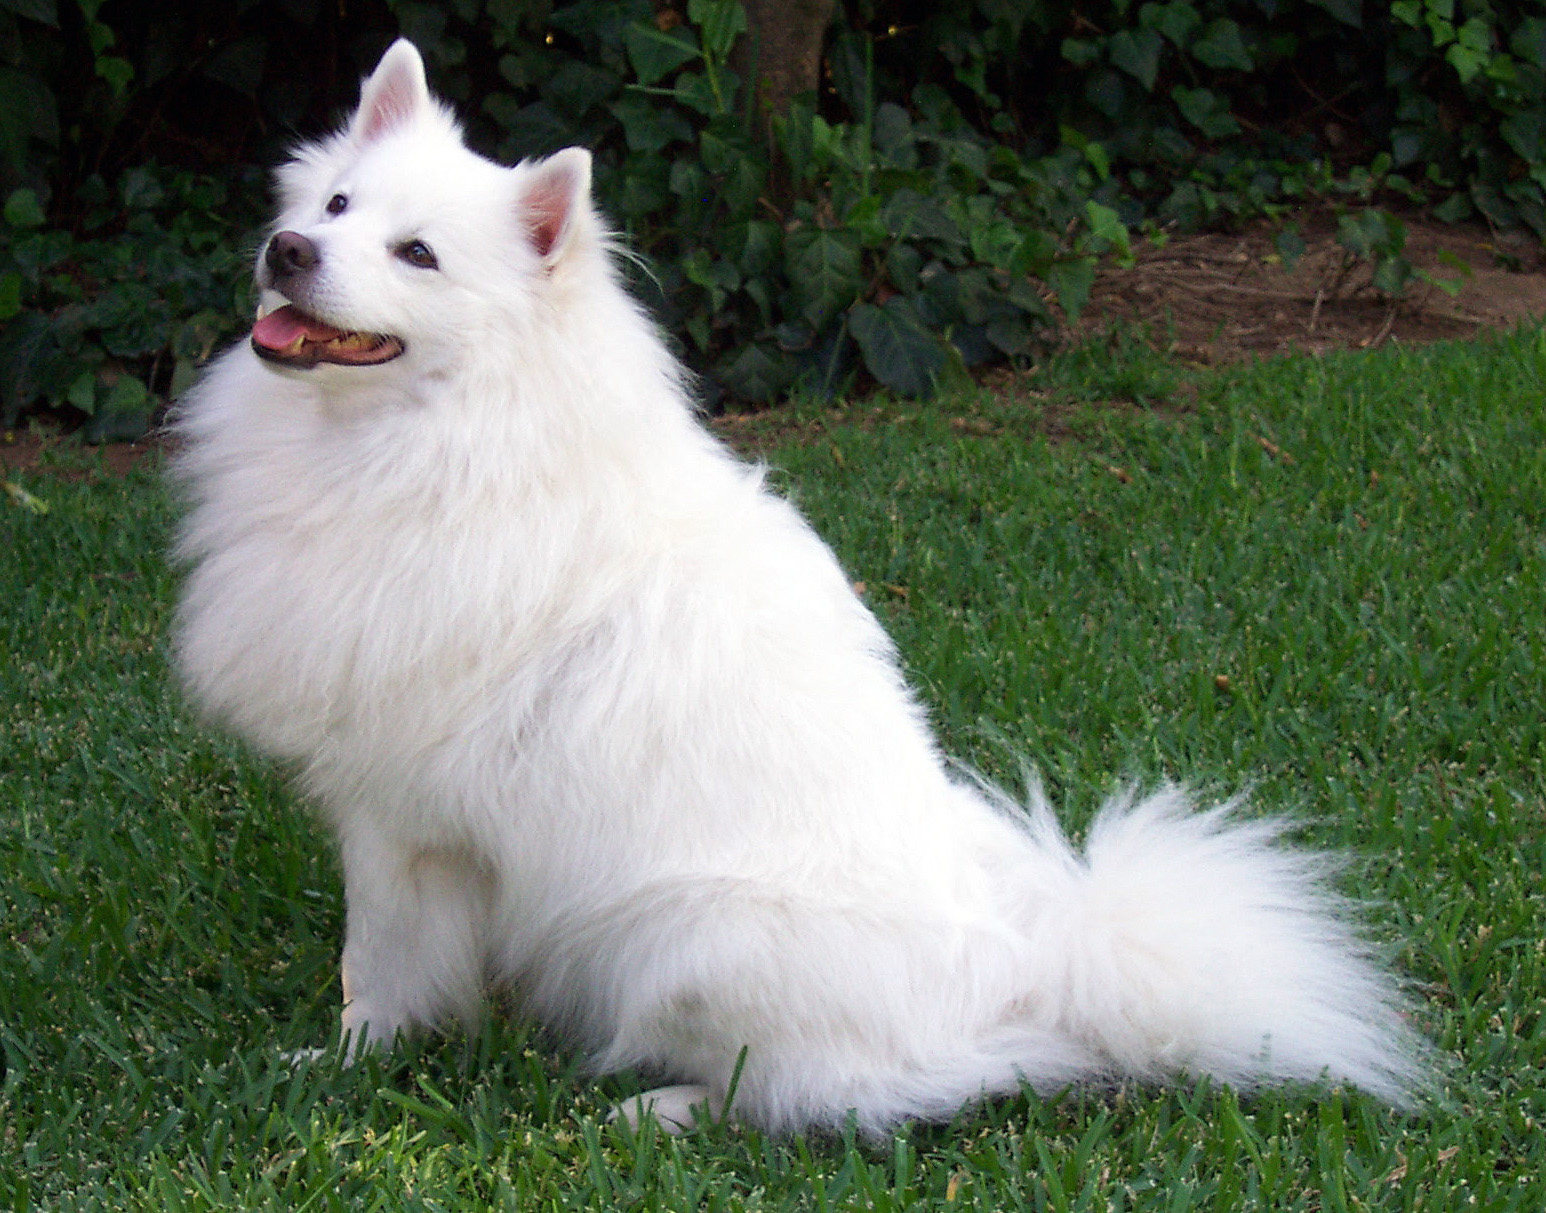

In [7]:
## View Sample Image
input_image = Image.open(filename)
print(type(input_image))
print("Input Shape:", input_image.size)
input_image

In [8]:
# Transformation

preprocess = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 224, 224])


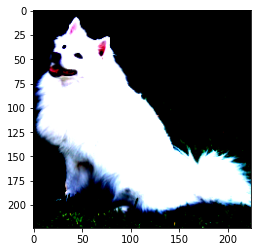

In [9]:
plt.imshow(input_tensor.permute(1,2,0))
print(input_tensor.shape)

In [101]:

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)

#output = model(input_batch)
    
# Tensor of shape 1000, with confidence scores over Imagenet's 1000 classes
print(output[0])

# The output has unnormalized scores. To get probabilities, you can run a softmax on it.
probabilities = torch.nn.functional.softmax(output[0], dim=0)
print(probabilities)

tensor([-1.0319e+00, -2.1531e+00, -4.2878e-01, -1.8105e+00, -1.0127e+00,
        -1.1724e+00, -1.2770e+00,  2.5407e+00,  3.7446e+00, -2.5410e+00,
        -4.7205e+00, -3.0318e+00, -4.1032e+00, -3.1716e+00, -3.2022e+00,
        -2.2158e+00, -4.5101e-01, -4.8393e-02, -8.4938e-01, -4.1555e+00,
        -3.0959e+00, -4.2993e-01, -2.8523e-01, -9.3374e-01, -2.8758e+00,
        -2.6880e+00, -3.1392e+00, -1.6096e+00, -2.3184e+00, -1.2338e+00,
        -1.6807e+00, -3.3786e+00, -3.3945e+00, -4.5544e+00, -3.4067e+00,
        -3.5543e+00, -3.5662e+00, -3.7351e+00, -4.4353e+00, -1.6448e+00,
        -2.1012e+00, -4.1415e+00, -3.9920e+00, -3.6910e+00, -2.2083e+00,
        -3.9309e+00, -1.0193e+00, -3.4839e+00, -3.9245e+00, -1.9201e+00,
        -1.0309e+00, -1.4181e+00, -2.1985e+00, -3.5887e+00, -2.9692e+00,
        -2.9842e+00, -3.0259e+00, -4.2683e+00, -3.5743e+00, -2.7504e+00,
        -2.2760e+00, -3.9607e+00, -4.6690e+00, -4.8482e+00, -3.3116e+00,
        -3.7719e+00, -2.5525e+00, -2.3042e+00, -3.9

In [102]:
# Show top categories per image
top5_prob, top5_catid = torch.topk(probabilities, 5)
for i in range(top5_prob.size(0)):
    print(categories[top5_catid[i]], top5_prob[i].item())

Samoyed 0.849316418170929
Eskimo dog 0.027908790856599808
white wolf 0.02727523446083069
Pomeranian 0.02424866333603859
collie 0.015028621070086956


In [103]:
features_conv = model.features[:20]

In [104]:
x=features_conv(input_batch)
x.shape

torch.Size([1, 512, 14, 14])

In [105]:
featureMaps = x.detach().numpy().squeeze()
featureMaps.shape

(512, 14, 14)

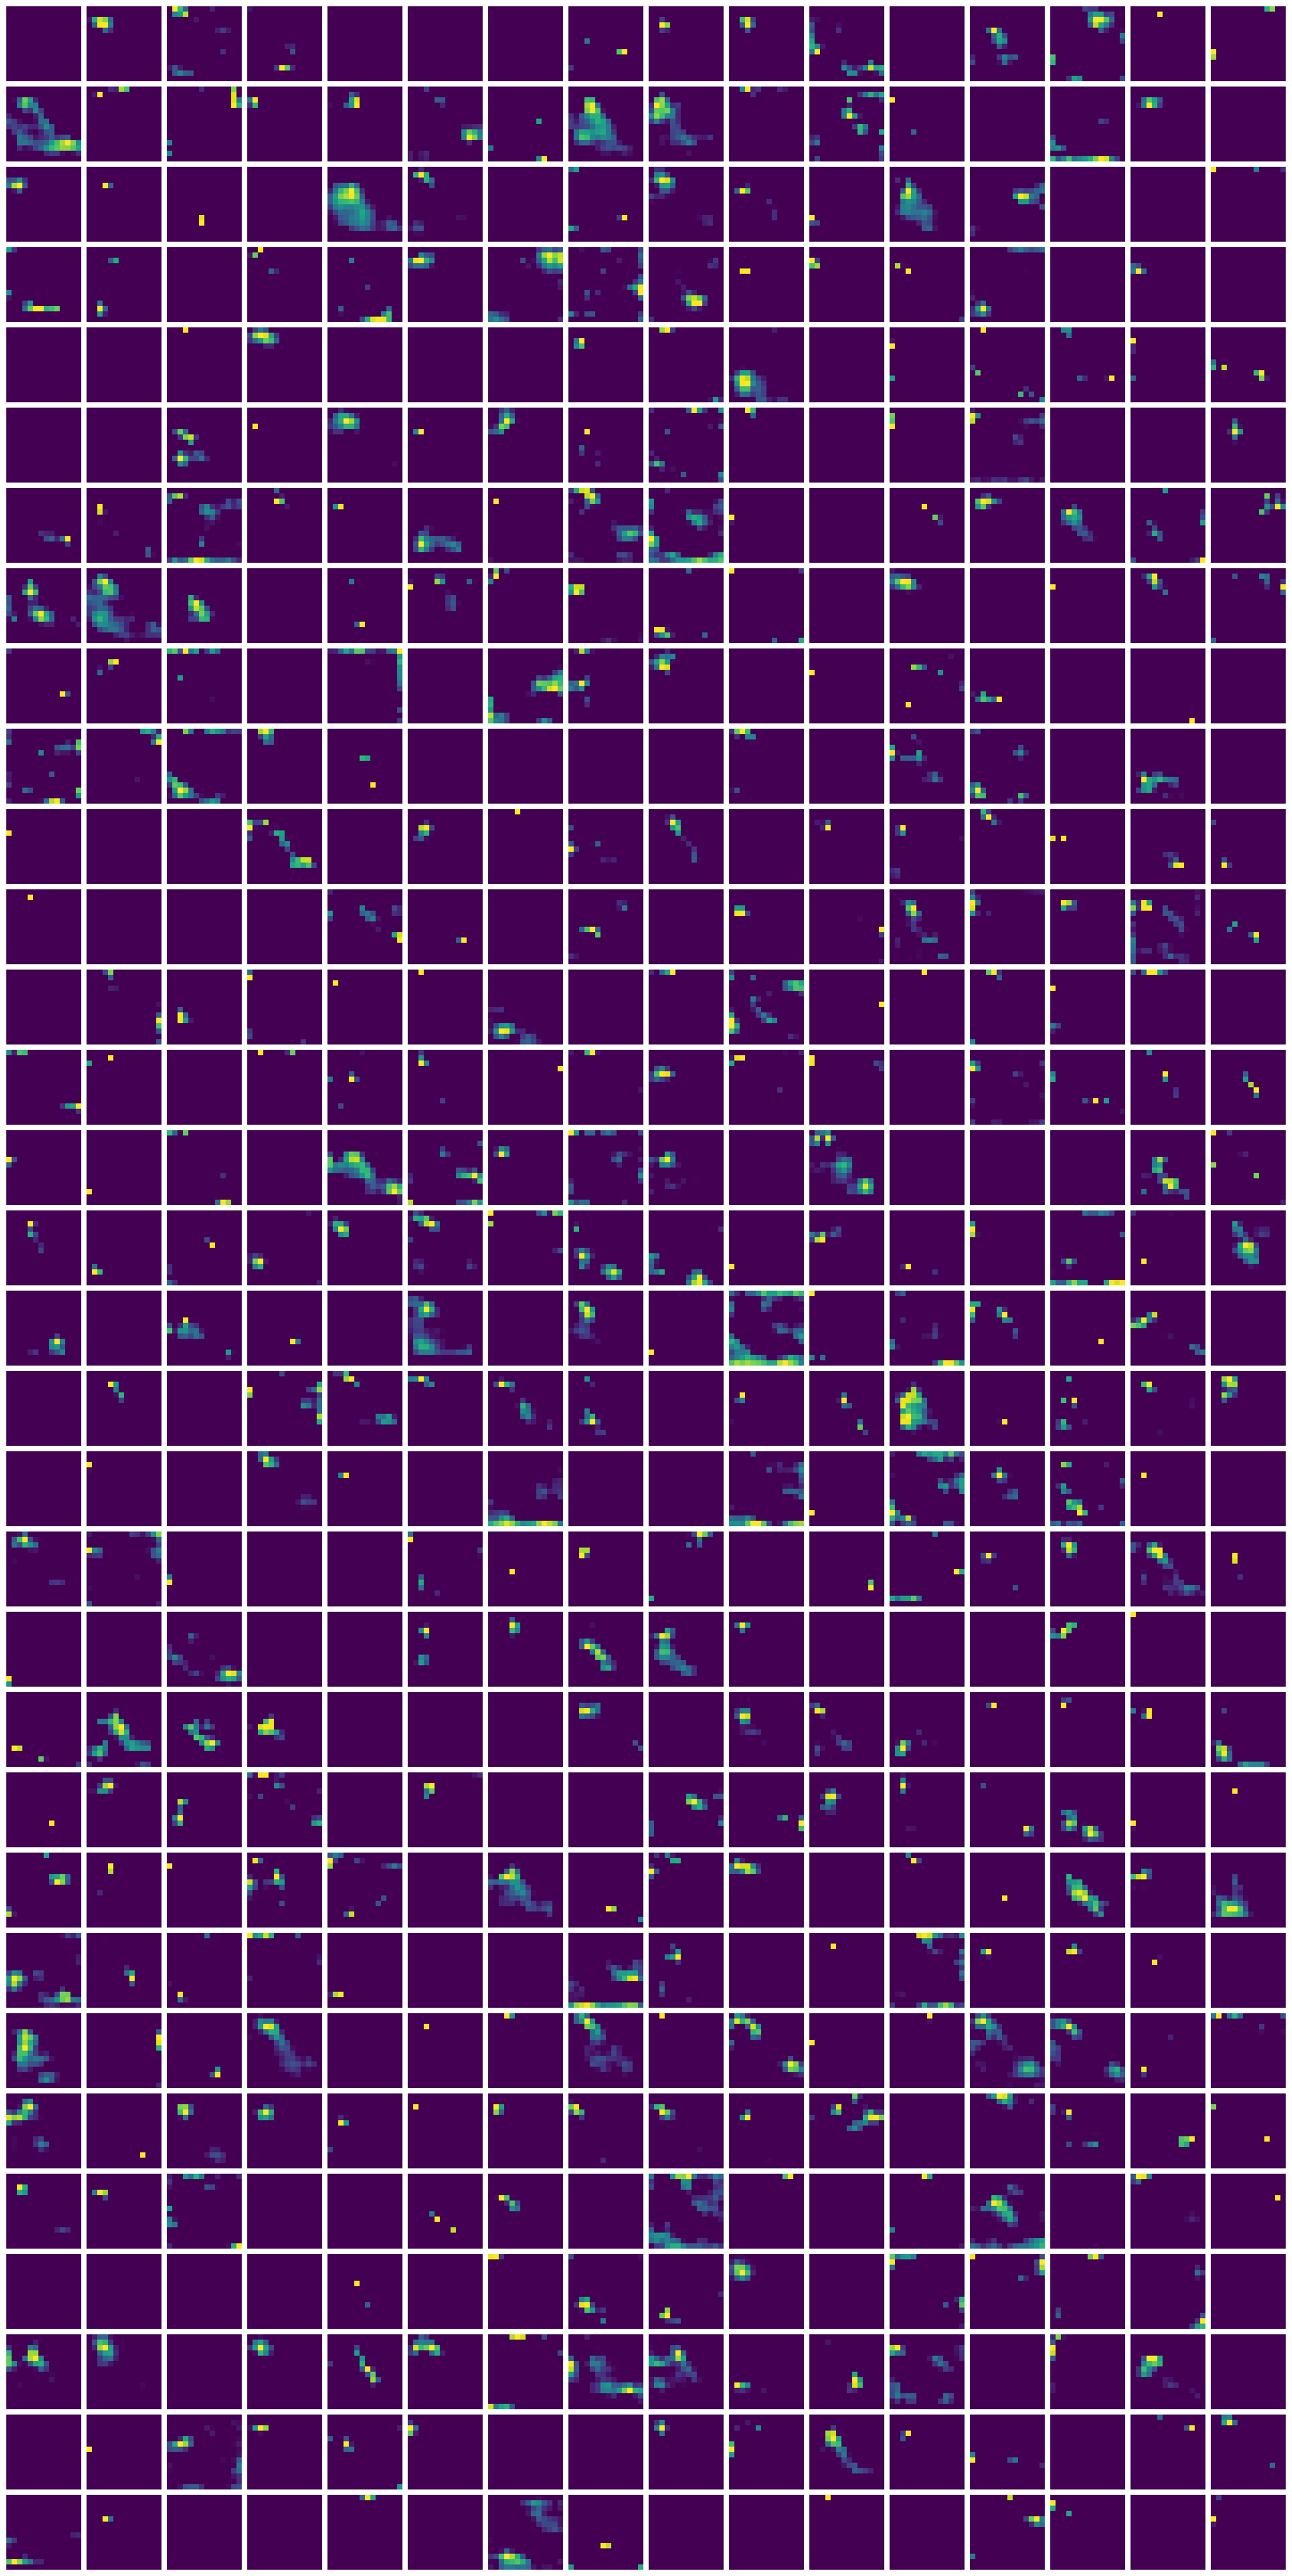

In [46]:

fig, axis = plt.subplots(32, 16,  figsize=(20, 40), constrained_layout=True)
c=0
for i in range(32):
    for j in range(16):
        axis[i,j].axis('off')
        axis[i,j].imshow(featureMaps[c])
        c+=1

In [97]:
model.classifier.detach()

AttributeError: 'Sequential' object has no attribute 'detach'

In [106]:

x.retain_grad()

In [107]:
z=model.features[20](x)
d=model.avgpool(z)
score = model.classifier(d.flatten())[top5_catid[0].item()]

In [108]:
score.backward(retain_graph=True)

In [109]:
x.grad

tensor([[[[-1.6887e-03,  0.0000e+00, -2.2304e-03,  ...,  0.0000e+00,
           -1.4673e-03,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
            0.0000e+00,  0.0000e+00],
          [-5.7181e-03,  0.0000e+00, -8.7529e-03,  ...,  0.0000e+00,
           -8.5565e-03,  0.0000e+00],
          ...,
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
            0.0000e+00,  0.0000e+00],
          [-3.5752e-03,  0.0000e+00, -4.1016e-03,  ...,  0.0000e+00,
           -1.1591e-03,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
            0.0000e+00,  0.0000e+00]],

         [[-7.0210e-03,  0.0000e+00, -5.8660e-03,  ...,  0.0000e+00,
           -4.2135e-03,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
            0.0000e+00,  0.0000e+00],
          [ 0.0000e+00, -1.1380e-02,  0.0000e+00,  ...,  0.0000e+00,
           -9.5760e-03,  0.0000e+00],
          ...,
     

In [110]:
x.grad.shape

torch.Size([1, 512, 14, 14])

In [112]:
feature_gradients = x.grad.detach().numpy().squeeze()
feature_gradients.shape

(512, 14, 14)

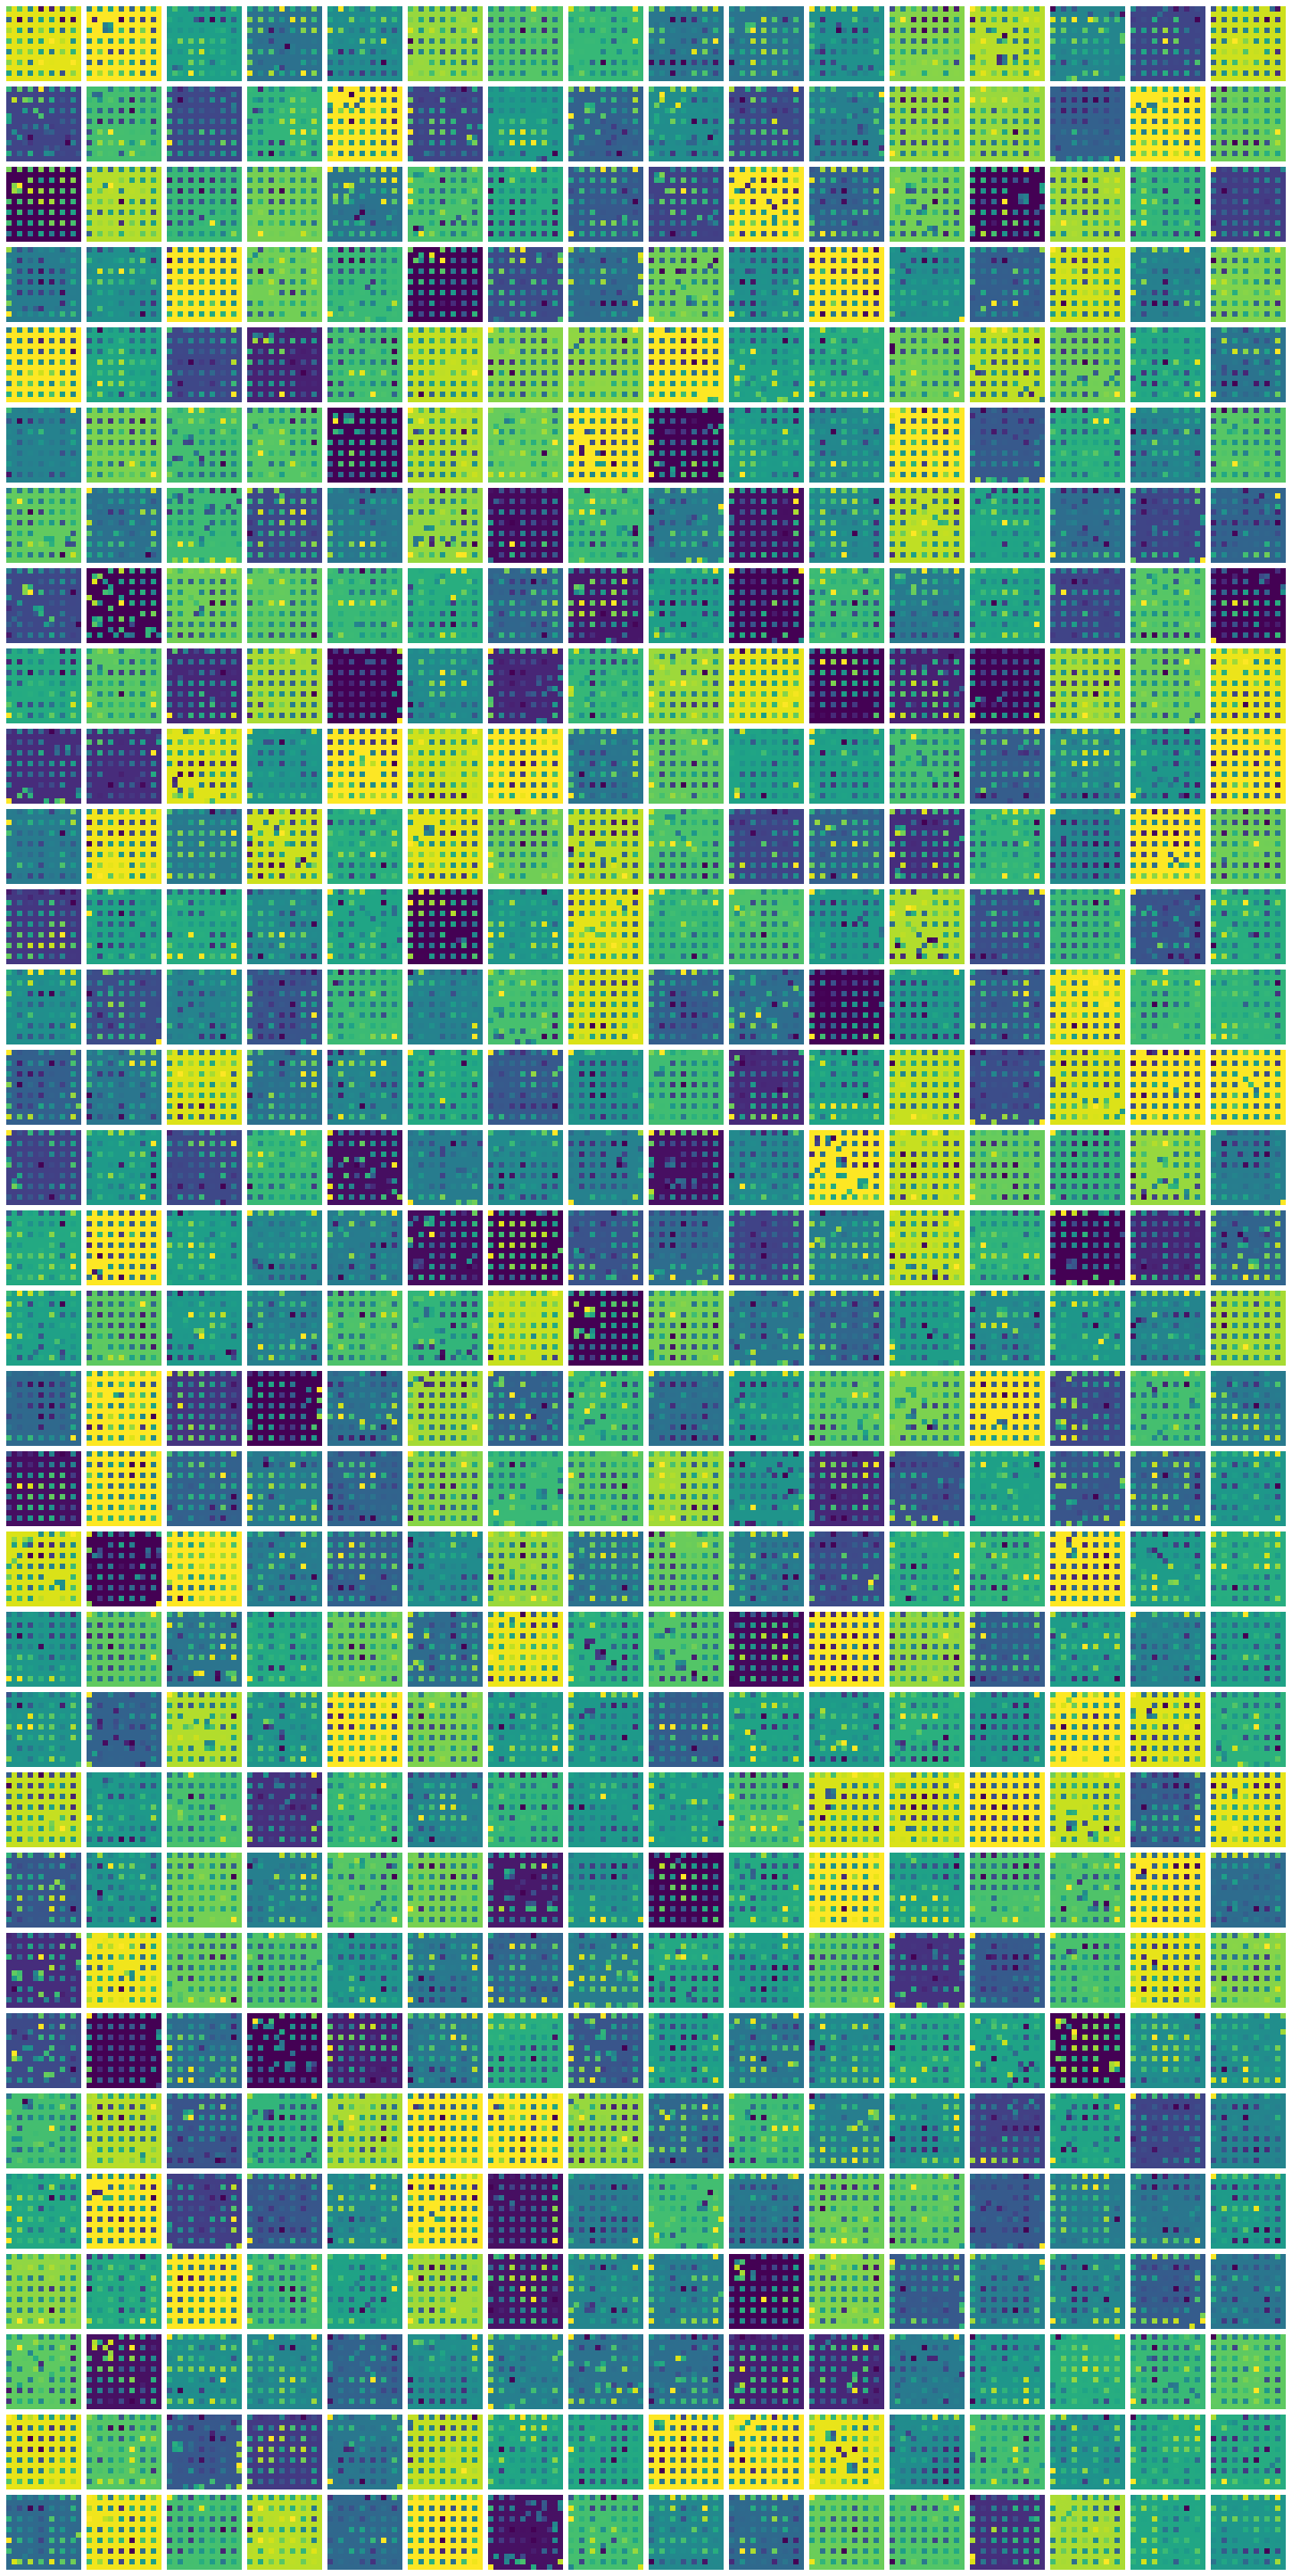

In [113]:
fig, axis = plt.subplots(32, 16,  figsize=(20, 40), constrained_layout=True)
c=0
for i in range(32):
    for j in range(16):
        axis[i,j].axis('off')
        axis[i,j].imshow(feature_gradients[c])
        c+=1

In [115]:
x=x+x.grad

In [116]:
z=model.features[20](x)
d=model.avgpool(z)
scores = model.classifier(d.flatten())

In [117]:
scores.shape

torch.Size([1000])

In [118]:

probabilities = torch.nn.functional.softmax(scores, dim=0)
print(probabilities)

tensor([2.6481e-07, 8.5483e-08, 4.9849e-07, 1.2138e-07, 2.6995e-07, 2.2835e-07,
        2.0726e-07, 9.8343e-06, 3.3392e-05, 5.7309e-08, 6.1904e-09, 3.4402e-08,
        1.1590e-08, 3.0119e-08, 2.8741e-08, 7.8931e-08, 4.6885e-07, 7.1035e-07,
        3.2127e-07, 1.1138e-08, 3.2247e-08, 4.8028e-07, 5.7216e-07, 2.9750e-07,
        4.0430e-08, 4.9233e-08, 3.0955e-08, 1.4678e-07, 7.1794e-08, 2.1694e-07,
        1.3417e-07, 2.3953e-08, 2.3627e-08, 7.3876e-09, 2.3824e-08, 2.0026e-08,
        2.0153e-08, 1.6501e-08, 8.2386e-09, 1.3995e-07, 8.8470e-08, 1.1026e-08,
        1.2958e-08, 1.7618e-08, 7.9352e-08, 1.3813e-08, 2.6174e-07, 2.1531e-08,
        1.4098e-08, 1.0872e-07, 2.6459e-07, 1.7816e-07, 8.0320e-08, 1.9752e-08,
        3.6303e-08, 3.5645e-08, 3.4995e-08, 9.7401e-09, 1.9972e-08, 4.4967e-08,
        7.4980e-08, 1.3218e-08, 6.3682e-09, 5.3657e-09, 2.5962e-08, 1.6315e-08,
        5.5502e-08, 7.1859e-08, 1.3703e-08, 5.5226e-09, 1.0071e-08, 9.1307e-08,
        2.7381e-08, 3.1438e-08, 5.3250e-

In [119]:
top5_prob, top5_catid = torch.topk(probabilities, 5)
for i in range(top5_prob.size(0)):
    print(categories[top5_catid[i]], top5_prob[i].item())

Samoyed 0.8661201000213623
white wolf 0.025326019152998924
Eskimo dog 0.025287186726927757
Pomeranian 0.021619047969579697
collie 0.013367542065680027


In [135]:
gap=np.mean(feature_gradients.reshape(-1, 14*14), axis=1)

In [136]:
gap.shape

(512,)

In [140]:
lc=0
for i in range(512):
    lc+=featureMaps[i]*gap[i]


In [151]:
L_GRAD_CAM = np.maximum(0,lc)

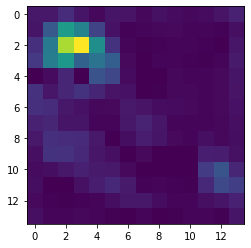

In [152]:
plt.imshow(L_GRAD_CAM)

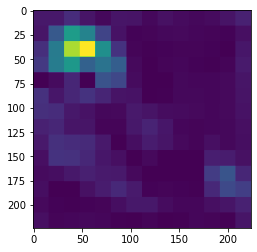

In [163]:
upSampled = np.kron(L_GRAD_CAM, np.ones((16, 16)))
plt.imshow(upSampled)

In [156]:
preprocess2 = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
])
input_tensor2 = preprocess2(input_image)

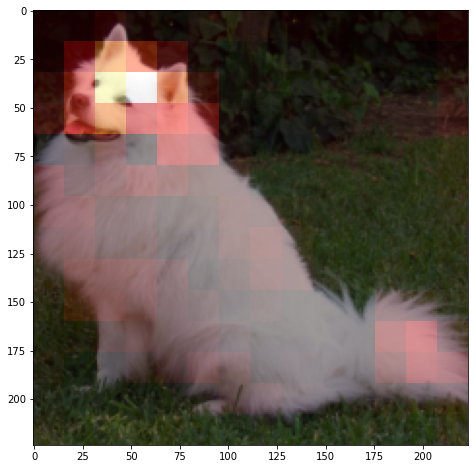

In [176]:
plt.figure(figsize=(8,8))
plt.imshow(input_tensor2.permute(1,2,0))
plt.imshow(upSampled, 'hot', interpolation='none', alpha=0.4)

### VGG16

In [61]:
vgg16 = torch.hub.load('pytorch/vision:v0.10.0', 'vgg16', pretrained=True)

Using cache found in C:\Users\Msc 2/.cache\torch\hub\pytorch_vision_v0.10.0


In [5]:
vgg16.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [8]:
summary(vgg16,(3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6        [-1, 128, 112, 112]          73,856
              ReLU-7        [-1, 128, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]         147,584
              ReLU-9        [-1, 128, 112, 112]               0
        MaxPool2d-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         295,168
             ReLU-12          [-1, 256, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]         590,080
             ReLU-14          [-1, 256,

In [11]:
# Download an example image
url, filename = ("https://raw.githubusercontent.com/utkuozbulak/pytorch-cnn-visualizations/master/input_images/cat_dog.png", "assets/cat_dog.png")
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self signed certificate in certificate chain (_ssl.c:1129)>

<class 'PIL.PngImagePlugin.PngImageFile'>
Input Shape: (224, 224)


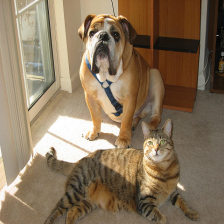

In [13]:
input_image = Image.open("assets/cat_dog.png")
print(type(input_image))
print("Input Shape:", input_image.size)
input_image

In [14]:
preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 224, 224])


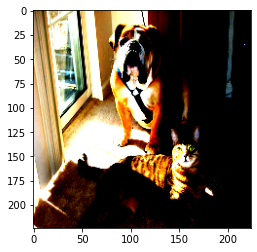

In [15]:
plt.imshow(input_tensor.permute(1,2,0))
print(input_tensor.shape)

In [16]:
with torch.no_grad():
    output = vgg16(input_batch)

#output = model(input_batch)
    
# Tensor of shape 1000, with confidence scores over Imagenet's 1000 classes
print(output[0])

# The output has unnormalized scores. To get probabilities, you can run a softmax on it.
probabilities = torch.nn.functional.softmax(output[0], dim=0)
print(probabilities)

tensor([-2.1113e+00, -3.0873e+00, -2.9957e+00, -2.8748e+00, -1.8326e+00,
        -3.6101e+00, -2.4399e+00, -1.5365e+00, -2.1376e+00, -4.3057e+00,
        -1.4839e+00, -4.0389e+00, -2.9194e+00, -2.2351e+00, -4.6299e+00,
        -2.7610e+00, -4.4847e+00, -1.0076e+00, -3.4214e+00, -3.0319e+00,
        -4.2723e+00, -3.6428e+00, -4.7336e+00, -3.6773e+00, -8.8625e-01,
        -1.7835e+00, -5.3225e+00, -3.9644e+00, -3.6901e+00, -2.9457e+00,
         7.2704e-01, -1.0160e+00, -9.1067e-01,  1.5796e+00,  8.5651e-01,
         3.4394e-01,  1.9434e+00,  2.6046e+00, -1.8896e+00,  2.3323e+00,
        -2.4477e+00, -1.9986e+00, -4.4935e+00, -2.7438e+00, -6.4664e-01,
         1.8038e-01, -5.5634e-01, -2.5713e+00,  2.6310e-01, -2.4185e+00,
        -1.1110e+00, -2.7015e-01,  3.4555e-01, -1.4614e+00, -2.5104e-01,
        -7.2440e-01, -8.3023e-01, -1.9574e+00, -1.9147e+00, -2.3316e+00,
         1.3658e+00,  1.3561e+00,  4.1516e-01, -1.9082e+00, -1.5024e+00,
        -6.5143e-01, -4.9985e-01, -4.0811e-01, -1.7

In [19]:
top5_prob, top5_catid = torch.topk(probabilities, 5)
for i in range(top5_prob.size(0)):
    print(categories[top5_catid[i]], top5_prob[i].item())

bull mastiff 0.49064308404922485
pug 0.3309542238712311
boxer 0.05585550516843796
French bulldog 0.019684918224811554
American Staffordshire terrier 0.013628064654767513


In [20]:
features_conv = vgg16.features[:30]

In [22]:
x=features_conv(input_batch)
x.shape

torch.Size([1, 512, 14, 14])

In [23]:
featureMaps = x.detach().numpy().squeeze()
featureMaps.shape

(512, 14, 14)

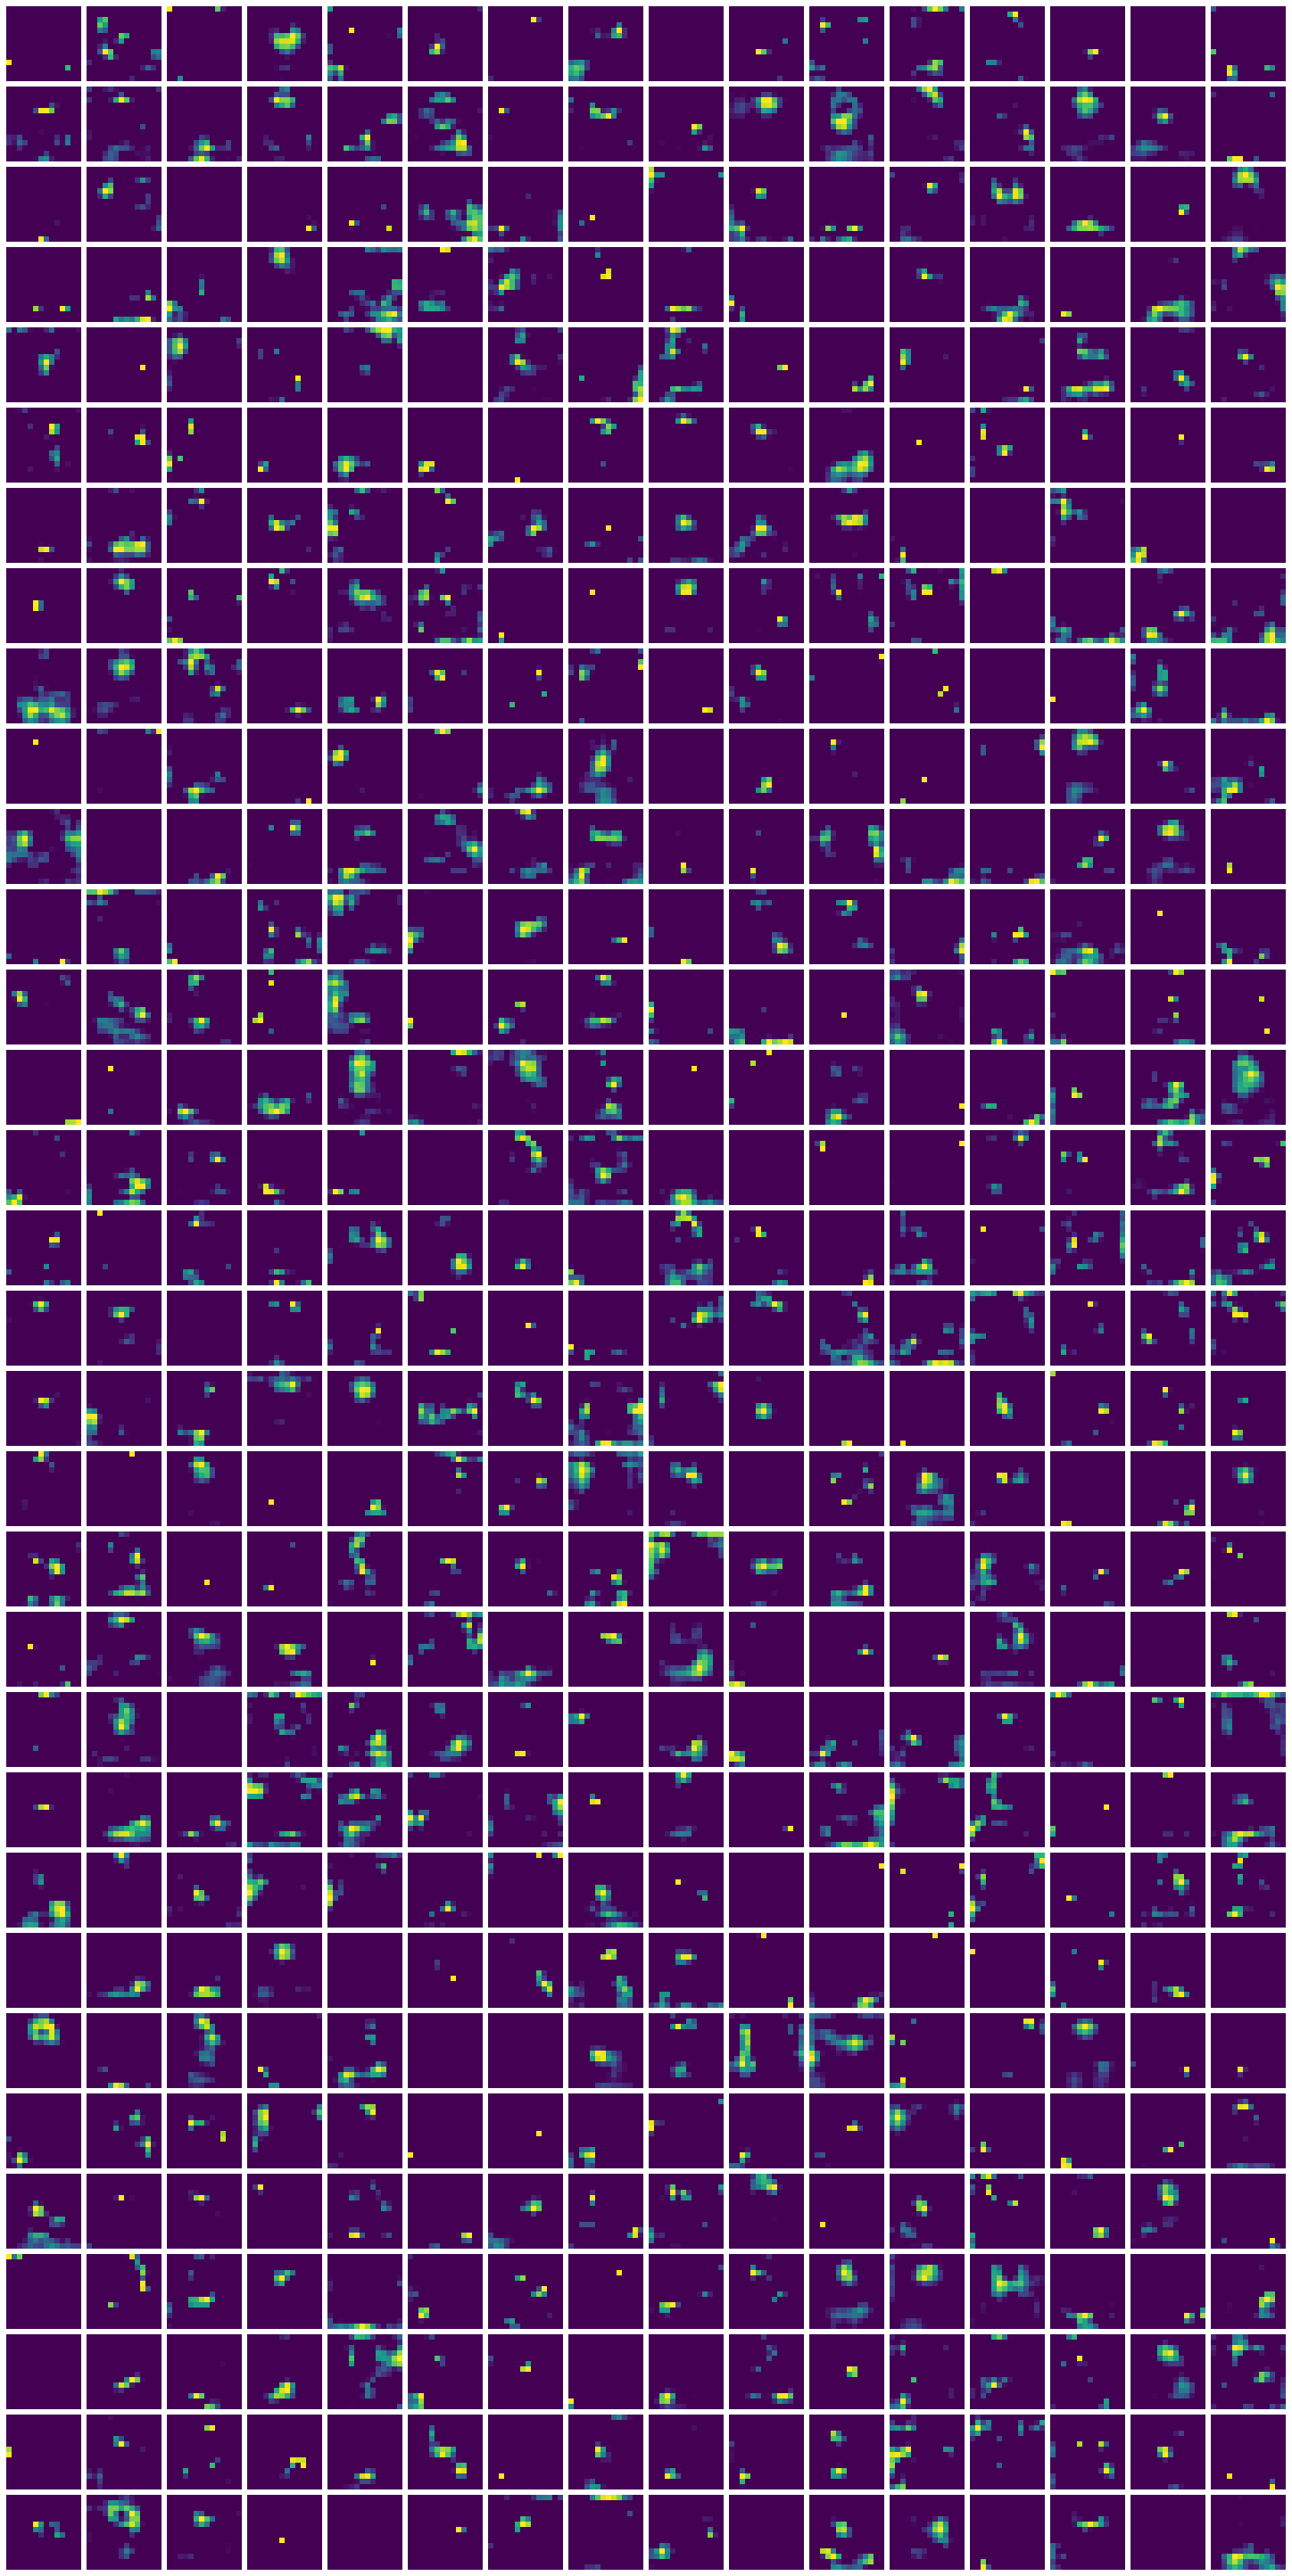

In [24]:

fig, axis = plt.subplots(32, 16,  figsize=(20, 40), constrained_layout=True)
c=0
for i in range(32):
    for j in range(16):
        axis[i,j].axis('off')
        axis[i,j].imshow(featureMaps[c])
        c+=1

In [45]:
x=x.detach()
x.requires_grad=True
with torch.autograd.set_detect_anomaly(True):
    x.retain_grad()
    a=vgg16.features[30](x)
    b=vgg16.avgpool(a)
    sc = vgg16.classifier(b.flatten())[top5_catid[0].item()]
    sc.backward(retain_graph=True)

In [46]:
x.grad

tensor([[[[-1.9445e-03,  0.0000e+00, -3.0213e-03,  ...,  0.0000e+00,
            1.8051e-04,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
            0.0000e+00,  0.0000e+00],
          [-2.1159e-03,  0.0000e+00, -1.1825e-03,  ...,  0.0000e+00,
           -6.7043e-05,  0.0000e+00],
          ...,
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ..., -3.9778e-03,
            0.0000e+00,  0.0000e+00],
          [ 7.2279e-03,  0.0000e+00,  9.7686e-04,  ...,  0.0000e+00,
            5.5611e-03,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
            0.0000e+00,  0.0000e+00]],

         [[ 9.3983e-04,  0.0000e+00,  5.1110e-04,  ...,  0.0000e+00,
            3.9548e-03,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
            0.0000e+00,  0.0000e+00],
          [ 2.1598e-03,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
            3.2319e-03,  0.0000e+00],
          ...,
     

In [47]:
x.grad.shape

torch.Size([1, 512, 14, 14])

In [48]:
feature_gradients = x.grad.detach().numpy().squeeze()
feature_gradients.shape

(512, 14, 14)

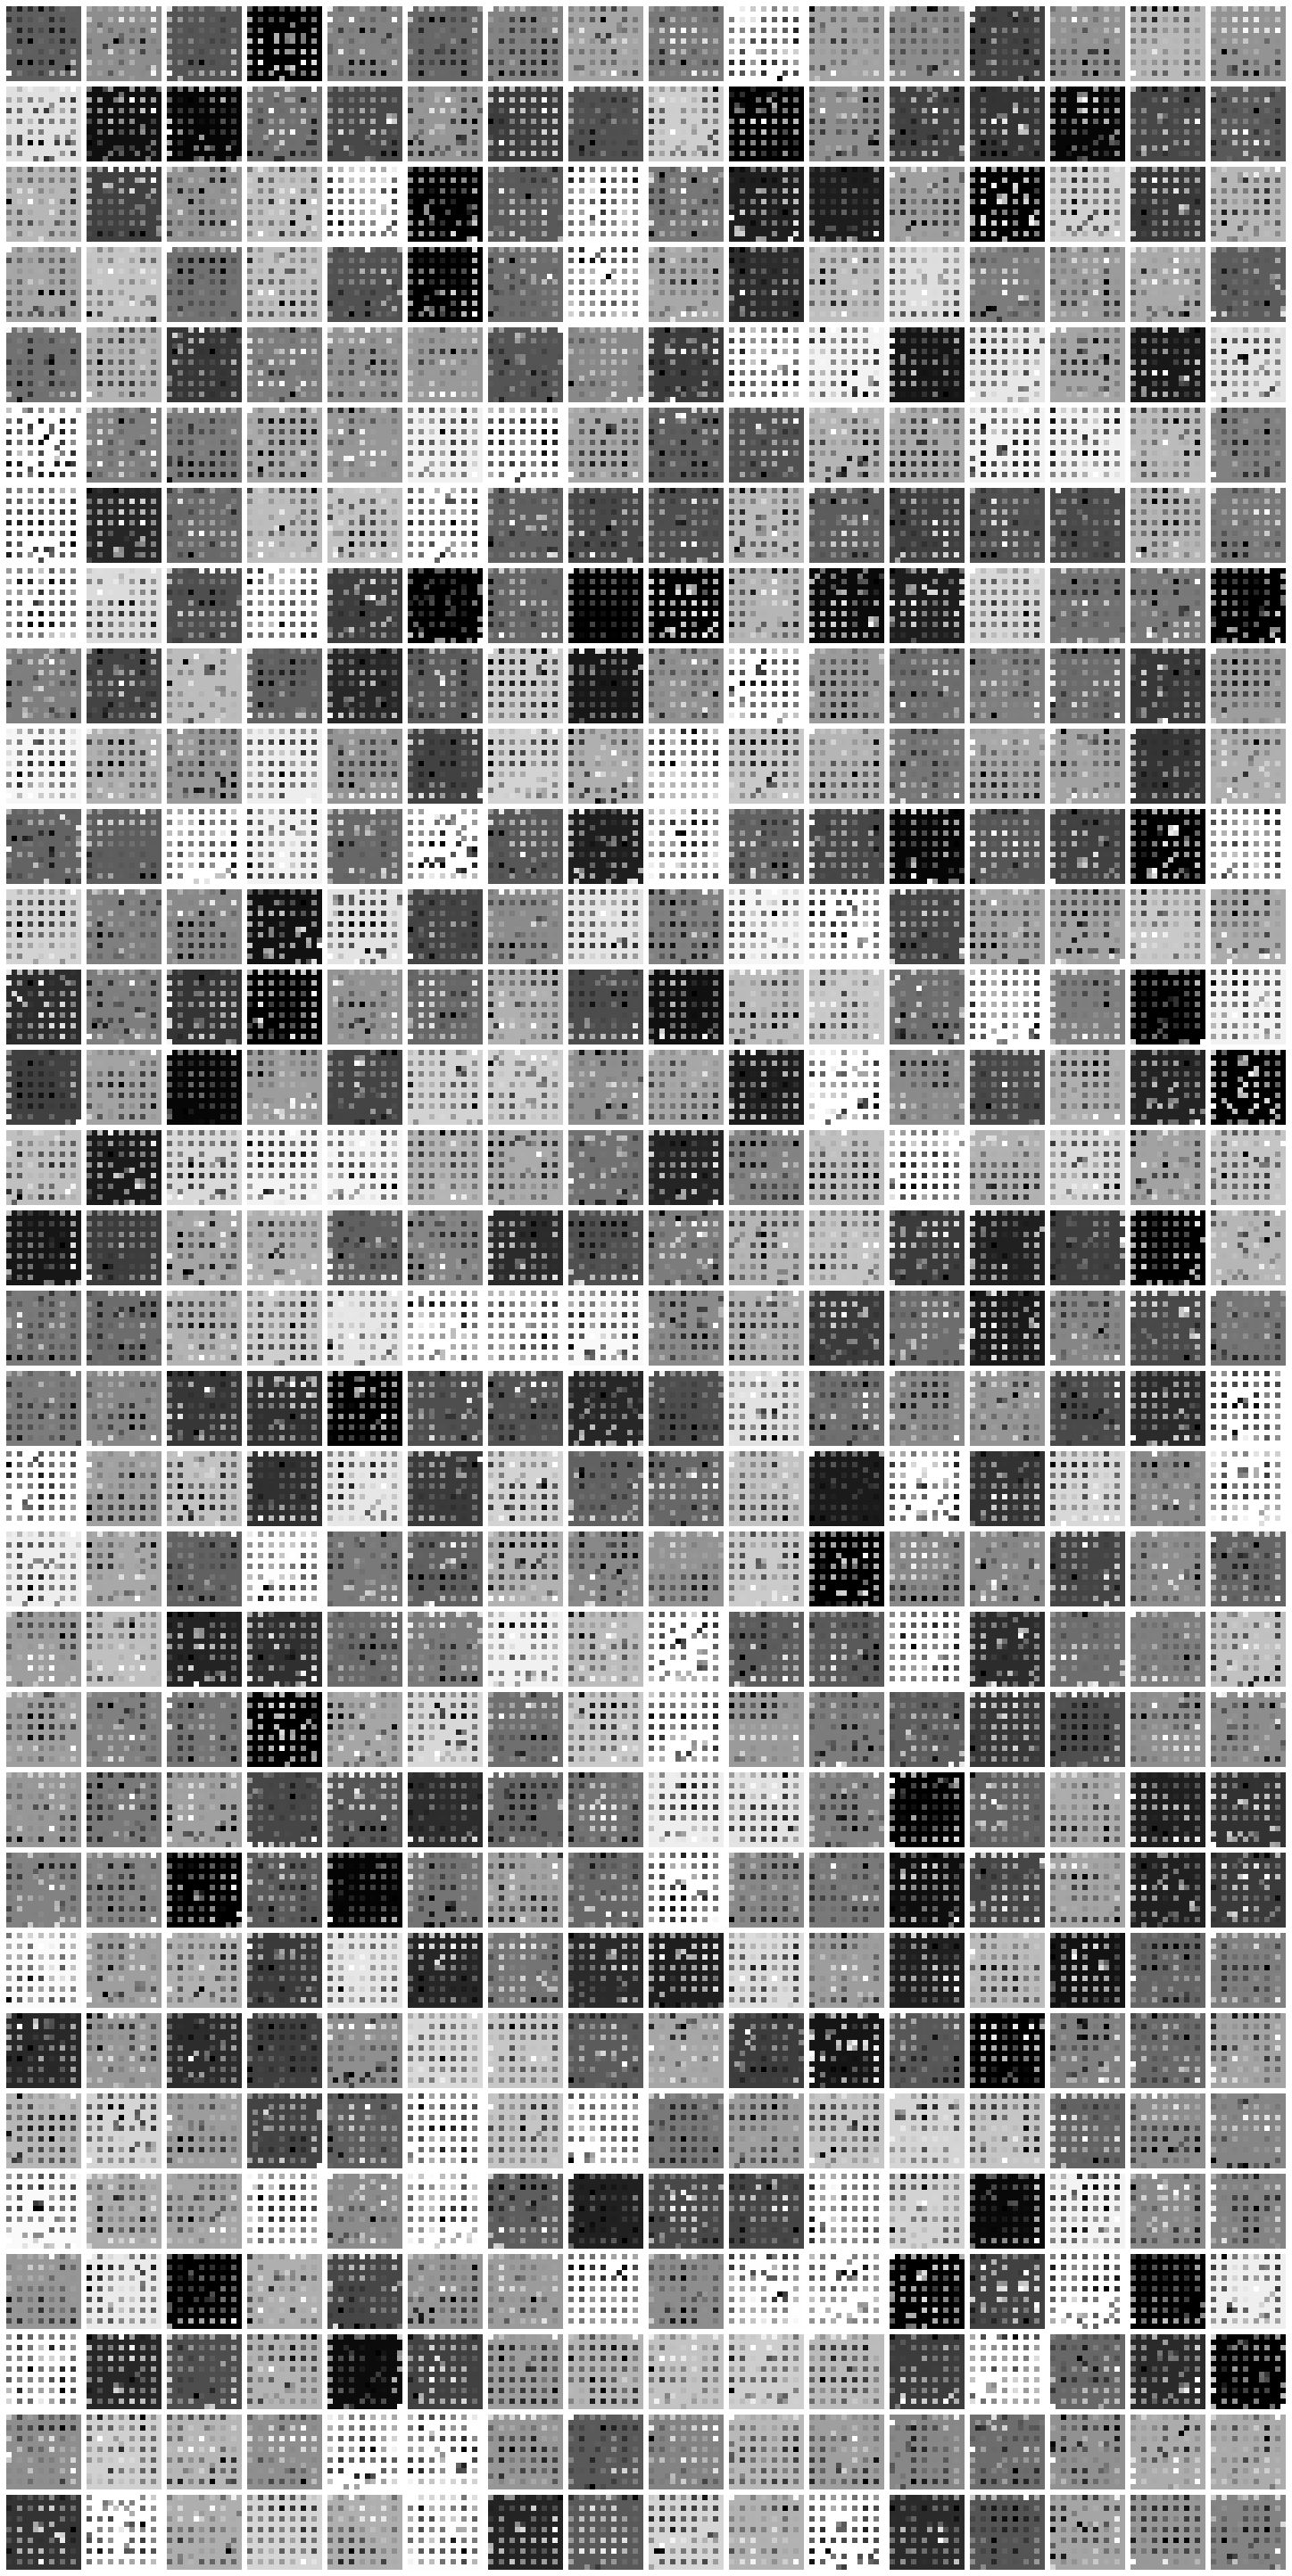

In [49]:
fig, axis = plt.subplots(32, 16,  figsize=(20, 40), constrained_layout=True)
c=0
for i in range(32):
    for j in range(16):
        axis[i,j].axis('off')
        axis[i,j].imshow(feature_gradients[c], 'gray')
        c+=1

In [50]:
gap=np.mean(feature_gradients.reshape(-1, 14*14), axis=1)
gap.shape

(512,)

In [51]:
lc=0
for i in range(512):
    lc+=featureMaps[i]*gap[i]


In [52]:
L_GRAD_CAM = np.maximum(0,lc)

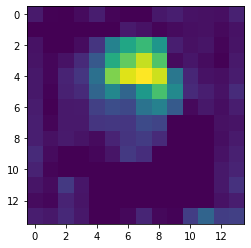

In [53]:
plt.imshow(L_GRAD_CAM)

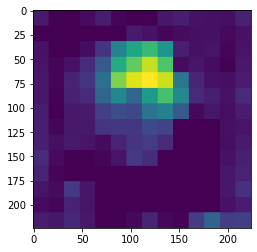

In [54]:
upSampled = np.kron(L_GRAD_CAM, np.ones((16, 16)))
plt.imshow(upSampled)

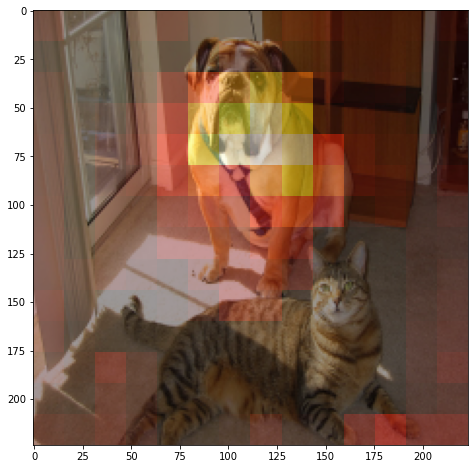

In [55]:
plt.figure(figsize=(8,8))
plt.imshow(input_image)
plt.imshow(upSampled, 'hot', interpolation='none', alpha=0.4)

### Deconvolution

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 224, 224])


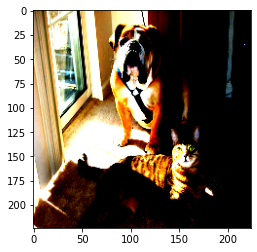

In [58]:
plt.imshow(input_tensor.permute(1,2,0))
print(input_tensor.shape)

In [64]:
input_batch.requires_grad=True
with torch.autograd.set_detect_anomaly(True):
    input_batch.retain_grad()
    a=vgg16(input_batch)[0,top5_catid[0].item()]
    a.backward(retain_graph=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


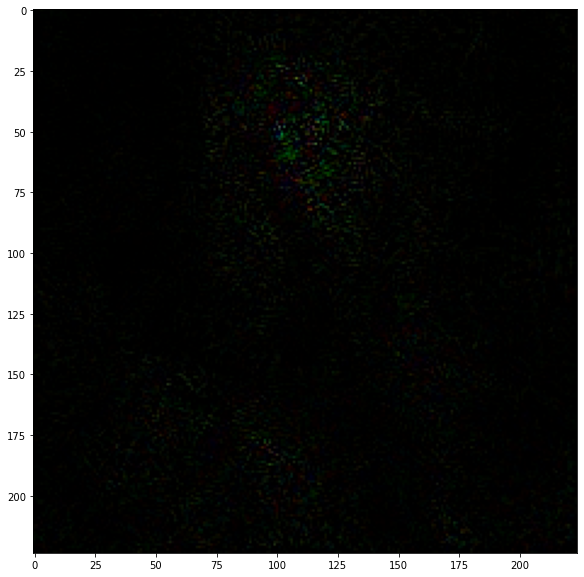

In [69]:
plt.figure(figsize=(10,10))
plt.imshow(input_batch.grad.squeeze().permute(1,2,0))